# Tercer Analisís al índice Busátil S&P 500.
## ESE-IPN.
## Series de Tiempo.
# Ismael Domínguez Olalde.

In [ ]:
#Importar Librería
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
SyP = pd.read_csv("C:/Users/ismay/OneDrive/Escritorio/Series/Bases/Serie_S&P500_+2variables.csv", usecols = ["Fecha", "S&P", "Amazon", "Azo", "t", "t^2", "M1", "M2", "M3", "M4","M5", "M6", "M7", "M8","M9", "M10", "M11","M12"])

index = pd.Index(sm.tsa.datetools.dates_from_range('2000M1', '2021M12'))
SyP.index = index

SyP.head(12)

,Fecha,S&P,Amazon,Azo,t,t^2,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
2000-01-31,31/01/2000,1394.46,64.5600,26.250000,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2000-02-29,28/02/2000,1366.42,68.8750,24.000000,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2000-03-31,29/03/2000,1508.52,67.0000,27.750000,3,9,0,0,1,0,0,0,0,0,0,0,0,0
2000-04-30,30/04/2000,1468.25,55.1875,22.937500,4,16,0,0,0,1,0,0,0,0,0,0,0,0
2000-05-31,31/05/2000,1420.60,48.3125,28.000000,5,25,0,0,0,0,1,0,0,0,0,0,0,0
2000-06-30,28/06/2000,1454.82,36.3125,22.015625,6,36,0,0,0,0,0,1,0,0,0,0,0,0
2000-07-31,31/07/2000,1430.83,30.1250,22.875000,7,49,0,0,0,0,0,0,1,0,0,0,0,0
2000-08-31,30/08/2000,1502.59,41.5000,22.515625,8,64,0,0,0,0,0,0,0,1,0,0,0,0
2000-09-30,30/09/2000,1436.51,38.4375,22.687500,9,81,0,0,0,0,0,0,0,0,1,0,0,0
2000-10-31,31/10/2000,1429.40,36.6250,26.812500,10,100,0,0,0,0,0,0,0,0,0,1,0,0


## 1. Anlisis exploratorio. (Describir variable de interés. Referir a los datos, frecuencia, unidad de medida, fuente, etc. Graficar los datos, analizar patrones y observaciones atípicas. Apoyar análisis con una descomposici ́on STL.)

## Describir variables de interés y Referir datos.

## **Para la variable S&P 500 (S&P)**

### **Información General**

La serie de tiempo escogida para este trabajo es el indicador bursátil llamado S&P 500 (Standard & Poor´s 500). Este índice es uno de los índices mas importantes de la economía estadounidense, ya que este representa la capitalización de las 500 empresas más grandes en cotización en la bolsa de valores (NYSE o NASDAQ).

La justificación de la elección de esta variable, esta en la forma que es ponderada, (a través del capital flotante) la cual la hacen de los índices mas representativo de la situación del mercado accionario, principalmente estadounidense. Este indicador existe en otras bolsas fuera de los Estados Unidos, pero este trabajo trabaja con el índice Estadounidense, ya que esta abarca las 500 empresas mas fuertes de este país, que en su mayor parte son las más fuertes del mundo.
Frecuencia.

### **Frecuencia**
La periodicidad con la que se le da mantenimiento al indicador es constante, por las características que debe tener para que este se mantenga como un indicador dentro de la bolsa, es por eso por lo que este varia cada segundo (ya sea la capitalización de las 500 empresas) durante esta abierta la bolsa NYSE o NASDAQ. Los valores que se toman son los de cierre, osease el valor con el que termina el día pero para no tener una base tan grande, se utilizo el valor de cierre del último día de cada mes, desde el año de 2000 al 2021. Brindándole así 265 observaciones.
Fuente.

### **Unidad de Medida**
Este índice se basa en la capitalización bursátil o como también es conocido, valor en bolsa. Esta medida es la utilizada por los mercados financieros y se estima al multiplicar el valor de las acciones por la cantidad de acciones en circulación. El indicador S&P 500, se pondera de la misma forma, pero como esta no solo es una acción, sino una cartera de inversiones, el indicador depende de su valor, de la capitalización de cada una de las empresas consideradas para el índice. Esta forma de ponderación también es llamada como capital flotante.

### **Fuente**
Al ser un valor en bolsa, este se saca de paginas especializadas en este rubro, como lo es yahoo finance:https://esus.finanzas.yahoo.com/quote/%5EGSPC?p=%5EGSPC&.tsrc=fin-srch

### **Fecha de consulta**
13/05/2022

## **Para la variable Amazon (Amazon)**

### **Información General**
En esta variable se describe el valor en bolsa que ha tenido Amazon desde inicios del año 2000 hasta finales de 2001. Dicha empresa es una de las más importantes a nivel mundial, según el *FORTUNE GLOBAL 500*, Ubica a Amazon el top 3 de las empresas más importantes del mundo, dicha importancia la ubica también dentro del indicador S&P 500, ya que es una de las 500 empresas que mayor cotizan ya sea en la bolsa de NASDAQ, la cual cuenta con una capitalización de aproximadamente 123 dólares por acción.
La justificación de esta variable va porque es una acción que no está dentro de las de mayor capitalización en el S&P 500, pero si es una de las más importantes a nivel mundial y aunque su capitalización no sea grande, si lo es lo suficiente para estar dentro de este indicador, es decir, con esta variable se pretende saber que tanto impacta una empresa de las más importantes del mundo pero con una capitalización promedio dentro del indicador, en las situaciones del mercado mundial. (recordando que el indicador S&P 500 es un indicador el cual representa la situación del mercado y como se basa de las dos principales bolsas de valores, podemos decir que es una representación del mercado mundial).

### **Frecuencia**
Al igual que la variable S&P 500, esta variable inicia el 31 de enero de 2000 y termina hasta el 31 de Diciembre del 2021, lo que le da un total de 264 observaciones

### **Unidad de Medida**
Esta variable tiene como unidad de media el valor de una acción al cierre de operaciones en la bolsa de valores, (en el caso de Amazon es NASDAQ) y al igual que la variable S&P, se encuentra en dólares.

### **Fuente**
Al ser un valor en bolsa, este se saca de páginas especializadas en este rubro, como lo es yahoo finance:https://esus.finanzas.yahoo.com/quote/%5EGSPC?p=%5EGSPC&.tsrc=fin-srch

### **Fecha de consulta**
13/05/2022

## **Para la variable AutoZone (Azo)**
Al igual que la variable 'Amazon' esta describe el valor en bolsa de la empresa AutoZone, esta compañía a diferencia de Amazon no se encuentra dentro del Rankin de *FORTUNE GLOBAL 500* la cual ranquea a las 500 empresas más importantes, pero a diferencia de esto, esta compañía si se encuentra dentro de las primeras compañías del indicador S&P 500, en cuanto a valor en bolsa, solo la supera Google inc. Lo cual la hace una variable totalmente distinta a la de Amazon.
Lo último es el por qué y justificación de dicha variable, ya que tenemos una de las empresas más grandes a nivel mundial pero con una cotización promedio en el indicador S&P 500 y ahora tenemos una variable importante para el mercado mundial, pero no se encuentra dentro de las 500 más importantes y aun así es top 2 del indicador S&P 500. Esto nos va a ayudar saber ¿Qué explica mejor al mercado mundial? ¿Una compañía de las más importantes del mundo pero con la posición número 153 de las empresas con mayor cotización en bolsa? o ¿Una compañía importante pero no lo suficiente para estar dentro de las 500 mejores empresas, pero si ser la segunda compañía que mayor cotiza en bolsa?

### **Frecuencia**
La variable *Azo* tiene una periodicidad idéntica a la de *Amazon*.

### **Fuente**
Al ser un valor en bolsa, este se saca de páginas especializadas en este rubro, como lo es yahoo finance:https://esus.finanzas.yahoo.com/quote/%5EGSPC?p=%5EGSPC&.tsrc=fin-srch

### **Fecha de consulta**
13/05/2022

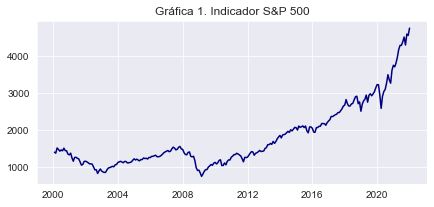

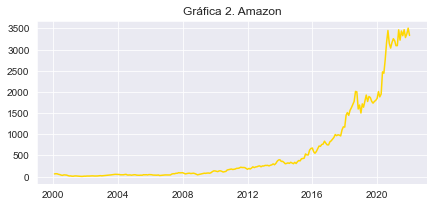

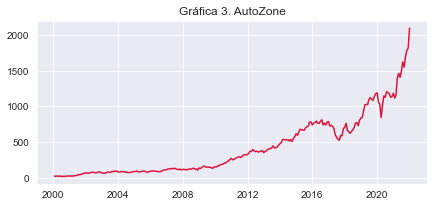

In [ ]:
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(SyP['S&P'], color= 'navy')
ax.set_title('Gráfica 1. Indicador S&P 500')
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(SyP['Amazon'], color= 'gold')
ax.set_title('Gráfica 2. Amazon')
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(SyP['Azo'], color= 'crimson')
ax.set_title('Gráfica 3. AutoZone')
plt.show()

## Frecuencia

### S&P 500

Text(0.5, 1.0, 'Gráfica 1.1 Tendencia S&P 500')

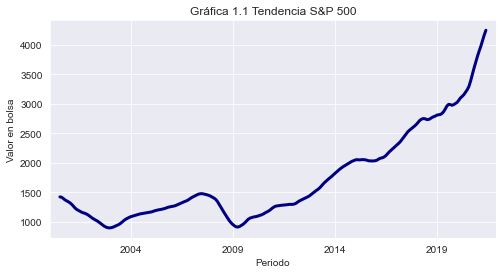

In [ ]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 8, 4
decomposition = sm.tsa.seasonal_decompose(SyP['S&P'], period=12)

fig, axes =plt.subplots(1, 1, sharex=True)
decomposition.trend.plot(legend=False, linewidth=3, color='navy')
axes.set_xlabel('Periodo')
axes.set_ylabel("Valor en bolsa")
axes.set_title('Gráfica 1.1 Tendencia S&P 500')

Como podemos ver en la **Gráfica 1.1** tenemos la tendencia de los datos de la variable S&P 500, la cual de manera general podemos describirla como creciente, pero al analizarla por partes, vemos que por periodos se tiene diferentes tendencias, del principio (2000) hasta poco antes del 2004 tenemos una tendencia decreciente posterior a eso los mercados fueron en aumento hasta llegar poco después de 2008, ya que en este año se dio la crisis de los suprime, lo cual se reflejó en el mercado de valores, ya que esta crisis fue una crisis financiera, posterior a esta crisis, el mercado tuvo varios años prósperos en cuanto a la capitalización bursátil del índice S&P 500. Hasta llegar a 2020 la cual sufre una caída repentina, la cual se debe a la pandemia del covid-19 y a las especulaciones negativas que se dieron debido a esta.

### Amazon (Amazon)

Text(0.5, 1.0, 'Gráfica 2.1 Tendencia Amazon')

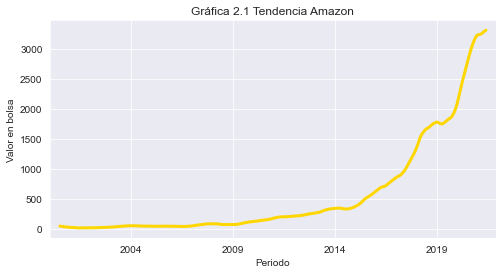

In [ ]:
rcParams['figure.figsize'] = 8, 4
decomposition = sm.tsa.seasonal_decompose(SyP['Amazon'], period=12)

fig, axes =plt.subplots(1, 1, sharex=True)
decomposition.trend.plot(legend=False, linewidth=3, color='gold')
axes.set_xlabel('Periodo')
axes.set_ylabel("Valor en bolsa")
axes.set_title('Gráfica 2.1 Tendencia Amazon')

Para abordar la frecuencia de estos datos, primero es preciso recalcar que el crecimiento de amazon es relativamente reciente, aunque esta compañia cotiza desde 1997 en NASDAQ, no siempre fue una de las 500 emprezas con mayor capitalizacion en la bolsa. No fue al rededor del año 2015 que esta compañia empezo a crecer y con ello el valor de sus acciones, es por ello que se tiene un crecimiento acelerado de su tendencia apartir de este año, hasta llegar a las cotizaciones un tanto elevadas. Esto le da una tendencia creciente en lo genral, pero desde lo particular desde el año 2000 al 2015 aproximadamente tenemos una varianza minima y tenemos una tendencia...

### AutoZoze (Azo)

Text(0.5, 1.0, 'Gráfica 2.1 Tendencia AutoZone')

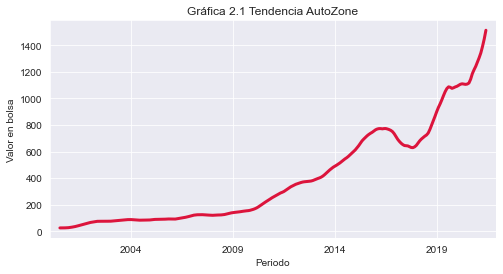

In [ ]:
rcParams['figure.figsize'] = 8, 4
decomposition = sm.tsa.seasonal_decompose(SyP['Azo'], period=12)

fig, axes =plt.subplots(1, 1, sharex=True)
decomposition.trend.plot(legend=False, linewidth=3, color='crimson')
axes.set_xlabel('Periodo')
axes.set_ylabel("Valor en bolsa")
axes.set_title('Gráfica 2.1 Tendencia AutoZone')

Podemos ver que la frecuencia de la serie "*Azo*" al igual que las otras dos tiene una tendencia positiva en lo general, pero al analizar puntos particulares, podemos ver que desde el año 2000 (inicio de la serie) hasta poquito antes de 2018 se tenía una pendiente marcadamente ascendente, debido a que la compañía y el mercado de valor empezó a obtener confianza y los especuladores creían en ambos, en esta fecha las acciones tienen una caída en su tendencia de tan solo meses y posterior se sigue con una tendencia creciente hasta el final de la serie, con excepción del inicio de la pandemia, donde la serie no cayo, pero si mantuvo su valor por pocos meses.

### Descomposición STL

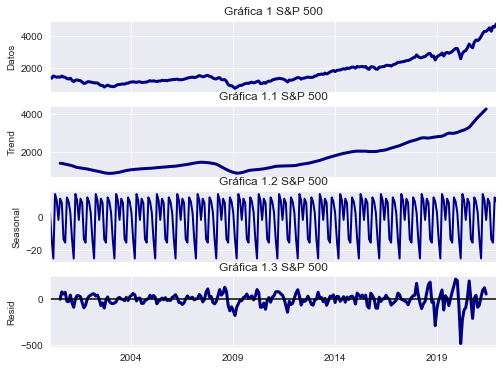

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
decomposition = sm.tsa.seasonal_decompose(SyP['S&P'], period=12)

fig, axes =plt.subplots(4, 1, sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False, linewidth=3, color='navy')
axes[0].set_ylabel('Datos')
axes[0].set_title('Gráfica 1 S&P 500')
decomposition.trend.plot(ax=axes[1], legend=False, linewidth=3, color='navy')
axes[1].set_ylabel('Trend')
axes[1].set_title('Gráfica 1.1 S&P 500')
decomposition.seasonal.plot(ax=axes[2], legend=False, linewidth=2, color='navy')
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Gráfica 1.2 S&P 500')
decomposition.resid.plot(ax=axes[3], legend=False, linewidth=3, color='navy')
axes[3].set_ylabel('Resid')
axes[3].axhline(0, color='black', linestyle='-')
axes[3].set_title('Gráfica 1.3 S&P 500')
plt.show()

La descomposición STL consta de 4 graficas, la **Gráfica 1** que ya analizamos y tres mas que tienen un análisis relevante para el entendimiento de la serie, las cuales son: la **Gráfica 1.1**, la **Gráfica 1.2** y la **Gráfica 1.3**, las cuales podemos clasificar como:

#### Tendencia

La cual es la **Grafica 1.2** esta representa lo que ya hemos visto hasta ahora, la tendencia, por lo que podemos reafirmar la tendencia creciente que tiene la serie.

#### Estacionalidad

La gráfica que representa la estacionalidad de la serie bajo el análisis de descomposición clásica es la **Gráfica 1.3**, en esta podemos ver que durante un comportamiento estacional el cual es el mismo para cada uno de esos periodos, por lo que decimos que la serie es **estacional**

#### Residuos

Por último tenemos el comportamiento residual de la variable, que se ve en la **Gráfica 1.4**, en donde podemos ver que el comportamiento de estos tiende a la media durante prácticamente toda la serie, pero es justamente al final, cuando los residuos se comportan de manera más dispersa.

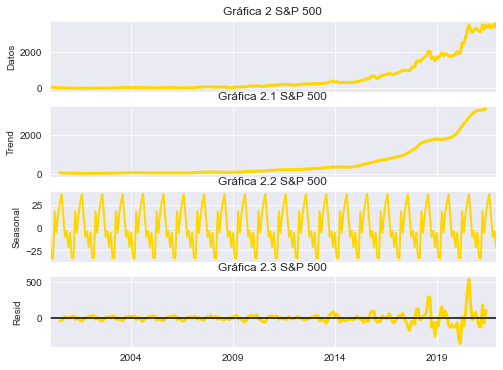

In [ ]:
rcParams['figure.figsize'] = 8, 6
decomposition = sm.tsa.seasonal_decompose(SyP['Amazon'], period=12)

fig, axes =plt.subplots(4, 1, sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False, linewidth=3, color='gold')
axes[0].set_ylabel('Datos')
axes[0].set_title('Gráfica 2 S&P 500')
decomposition.trend.plot(ax=axes[1], legend=False, linewidth=3, color='gold')
axes[1].set_ylabel('Trend')
axes[1].set_title('Gráfica 2.1 S&P 500')
decomposition.seasonal.plot(ax=axes[2], legend=False, linewidth=2, color='gold')
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Gráfica 2.2 S&P 500')
decomposition.resid.plot(ax=axes[3], legend=False, linewidth=3, color='gold')
axes[3].set_ylabel('Resid')
axes[3].axhline(0, color='black', linestyle='-')
axes[3].set_title('Gráfica 2.3 S&P 500')
plt.show()

#### Tendencia

La cual es la **Grafica 2.1** esta representa lo que ya hemos visto hasta ahora, la tendencia, por lo que podemos reafirmar la tendencia creciente que tiene la serie.

#### Estacionalidad

La gráfica que representa la estacionalidad de la serie bajo el análisis de descomposición STL es la **Gráfica 2.2**, en esta podemos ver que durante un comportamiento estacional el cual es el mismo para cada uno de esos periodos, por lo que decimos que la serie es **estacional**

#### Residuos

Por último tenemos el comportamiento residual de la variable, que se ve en la **Gráfica 2.3**, en donde podemos ver que el comportamiento de estos tiende a la media durante prácticamente toda la serie, pero es justamente al final, (al igual que en la serie (S&P) cuando los residuos se comportan de manera más dispersa.

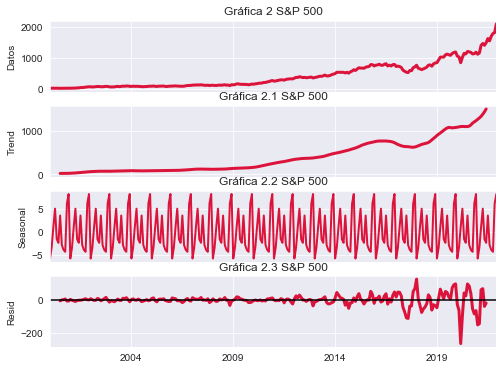

In [ ]:
rcParams['figure.figsize'] = 8, 6
decomposition = sm.tsa.seasonal_decompose(SyP['Azo'], period=12)

fig, axes =plt.subplots(4, 1, sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False, linewidth=3, color='crimson')
axes[0].set_ylabel('Datos')
axes[0].set_title('Gráfica 2 S&P 500')
decomposition.trend.plot(ax=axes[1], legend=False, linewidth=3, color='crimson')
axes[1].set_ylabel('Trend')
axes[1].set_title('Gráfica 2.1 S&P 500')
decomposition.seasonal.plot(ax=axes[2], legend=False, linewidth=2, color='crimson')
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Gráfica 2.2 S&P 500')
decomposition.resid.plot(ax=axes[3], legend=False, linewidth=3, color='crimson')
axes[3].set_ylabel('Resid')
axes[3].axhline(0, color='black', linestyle='-')
axes[3].set_title('Gráfica 2.3 S&P 500')
plt.show()

#### Tendencia

La cual es la **Grafica 3.1** esta representa lo que ya hemos visto hasta ahora, la tendencia, por lo que podemos reafirmar la tendencia creciente que tiene la serie.

#### Estacionalidad

La gráfica que representa la estacionalidad de la serie bajo este análisis es la **Gráfica 3.2**, en esta podemos ver que tiene un comportamiento estacional el cual es el mismo para cada uno de esos periodos, por lo que decimos que la serie es **estacional**

#### Residuos

Por último tenemos el comportamiento residual de la variable, que se ve en la **Gráfica 3.3**, en donde podemos ver que el comportamiento de estos tiende a la media durante prácticamente toda la serie, pero es justamente al final, cuando los residuos se comportan de manera más dispersa, al igual que las dos variables de la serie.

## 2. Establecer un pronóstico mediante modelos ARIMA, SARIMA O ARMA. (Evaluar estacionalidad, evaluar orden integración y definir AR-MA requerido, analisis residual, añadir pronóstico, definir ecuación.)

### Evaluar estacionalidad.

En la descomposición STL dijimos que las variables contaban con estacionalidad, pero la mejor forma de evaluar dicha estacionalidad es haciendo una regresión de las variables dummy, donde debemos quitar el valor de un mes, y hacer una regresión por variable por eso empezamos primero por:

### S&P:

In [ ]:
modE = smf.ols("S&P ~ t + M2 + M3 + M4 + M5 + M6 + M7 + M8 + M9 + M10 + M11 + M12", data = SyP).fit()
print(modE.summary())

                            OLS Regression Results                            
Dep. Variable:                    SyP   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     46.49
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           7.70e-57
Time:                        18:04:50   Log-Likelihood:                -2004.4
No. Observations:                 264   AIC:                             4035.
Df Residuals:                     251   BIC:                             4081.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    519.1164    116.455      4.458      0.0

Como podemos ver en la regresión anterior de nuestros datos S&P, el valor p para nuestras variables dummy en vada una es $> 0.05$ lo que rechaza la hipótesis nula, lo que quiere decir que **NO hay presencia de estacionalidad**.

### Amazon

In [ ]:
modE = smf.ols("Amazon ~ t + M2 + M3 + M4 + M5 + M6 + M7 + M8 + M9 + M10 + M11 + M12", data = SyP).fit()
print(modE.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amazon   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     33.72
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.25e-45
Time:                        18:51:00   Log-Likelihood:                -2050.6
No. Observations:                 264   AIC:                             4127.
Df Residuals:                     251   BIC:                             4174.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -675.7699    138.699     -4.872      0.0

Como podemos ver en la regresión anterior de nuestros datos Amazon, el valor p para nuestras variables dummy en vada una es $> 0.05$ lo que rechaza la hipótesis nula, lo que quiere decir que **NO hay presencia de estacionalidad**.

### Azo

In [ ]:
modE = smf.ols("Azo ~ t + M2 + M3 + M4 + M5 + M6 + M7 + M8 + M9 + M10 + M11 + M12", data = SyP).fit()
print(modE.summary())

                            OLS Regression Results                            
Dep. Variable:                    Azo   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     88.32
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           8.19e-83
Time:                        18:51:04   Log-Likelihood:                -1748.2
No. Observations:                 264   AIC:                             3522.
Df Residuals:                     251   BIC:                             3569.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -242.6154     44.130     -5.498      0.0

Como podemos ver en la regresión anterior de nuestros datos Azo, el valor p para nuestras variables dummy en vada una es $> 0.05$ lo que rechaza la hipótesis nula, lo que quiere decir que **NO hay presencia de estacionalidad**.

### Evaluar orden integración.

Primero debemos hacer la prueba Dickey-Fuller, para saber si nuestra serie es estacionaria.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
result = adfuller(SyP)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.872142
p-value: 1.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


Al hacer la prueba con estos datos nos arroja un valor p de $1.000000$, por lo que rechazamos la hipótesis nula que en la prueba Dickey-fuller significa que la serie NO es estacionaria.

Como la serie No es estacionaria se realizan diferencias para ver si se vuelve estacionaria.

### Primera diferencia.

In [ ]:
tspl= np.log(data['Cierre'])

Text(0.5, 1.0, 'Gráfica 4.1 S&PLog')

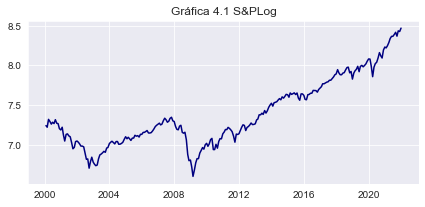

In [ ]:
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(tspl, color= "navy")
ax.set_title('Gráfica 4.1 S&PLog')

Realizamos transformaciones logarítmicas para que la información sea más interpretable.

Realizamos prueba Dickey-Fuller para saber si existe estacionariedad.

In [ ]:
result = adfuller(tspl)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.214136
p-value: 0.996082
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


Al hacer la prueba con estos datos nos arroja un valor p de $0.992575$, por lo que rechazamos la hipótesis nula que en la prueba Dickey-fuller significa que la serie NO es estacionaria. Por ello hacemos otra diferenciación.

### Segunda diferencia

In [ ]:
tspd= np.log(SyP['Cierre']).diff()

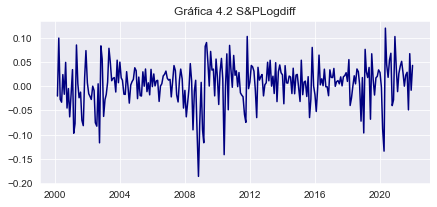

In [ ]:
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(tspd, color= "navy")
ax.set_title('Gráfica 4.2 S&PLogdiff')
plt.show()

Volvemos a hacer la prueba Dickey-Fuller para saber si ahora ya se encuentra estacionariedad.

In [ ]:
result = adfuller(tspd[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.017808
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


Al hacer la prueba con estos datos nos arroja un valor p de $\leq 0.000000$, por lo que no se rechaza la hipótesis nula, lo que significa que en este caso, la serie si es estacionaria.

## Definir AR-MA

A través de las herramientas **ACF** y **PACF** vamos a sacar el orden de medias móviles y autorregresivo para nuestro modelo arrima, empezando primero con...

### ACF

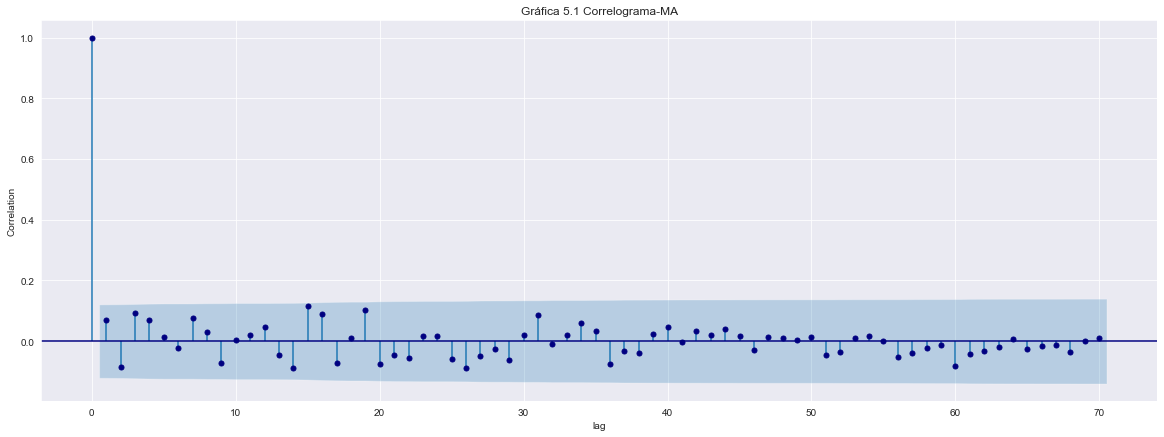

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt##
ax = plt.rcParams["figure.figsize"] = (20,7)
acf_plot = plot_acf(tspd.dropna(), lags = 70, color= 'navy')
plt.title("Gráfica 5.1 Correlograma-MA")
plt.xlabel('lag')
plt.ylabel('Correlation')
plt.show()

Con el proceso de medias moviles en nuestro modelo "*tspd*", osease, nuestra base logaritmica, nos indica un orden $MA=1$

### PACF

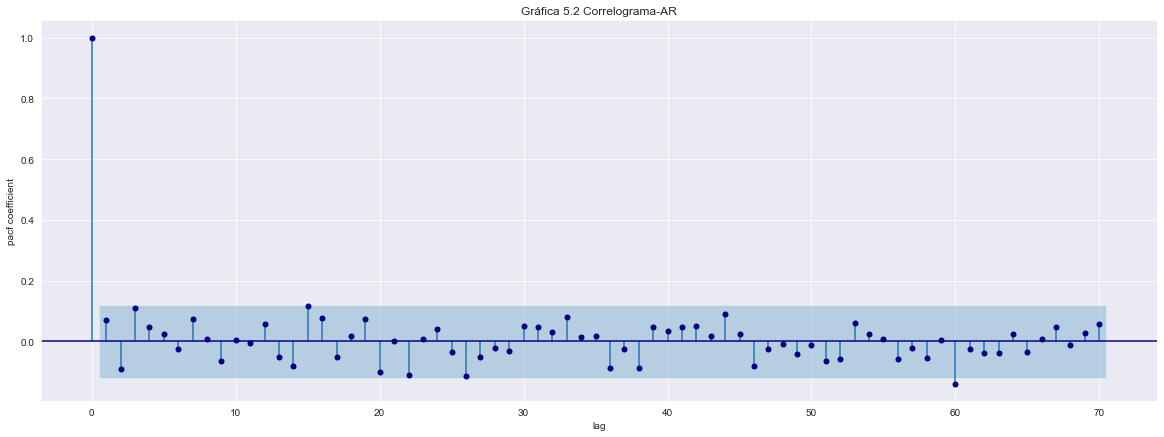

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)
acf_plot = plot_pacf(tspd.dropna(), lags = 70, color= "navy")
plt.title("Gráfica 5.2 Correlograma-AR")
plt.xlabel('lag')
plt.ylabel('pacf coefficient')
plt.show()

Al igual que en *ACF* El orden para $AR=1$, el cual lo sacamos con este proceso autorregresivo.

Hasta este punto, ya sabemos que nuestra serie no tiene estacionalidad, (Por la regresión con dummy's) en el apartado 4, además de que tampoco es estacionaria, (Prueba Dickey-Fuller) en el apartado 5 tomando no tomando en cuenta las transformaciones.

Esto quiere decir que necesitamos estimar un modelo ARIMA.

## Modelo ARMA.

Para plantear este modelo debemos recordar el número de rezagos que sacamos en el punto anterior, además de recordar de estamos trabajando con los valores tspd, el cual cuenta con una diferenciación, lo que la hace estacionaria por lo que el modelo quedaría especificado como: $(p,d,q) = (1, 0, 1)$, recordando que $d$ es el orden de integración y como estas realizando el modelo *Arma*, la cual se realiza con nuestra serie estacionarios, ponemos en esta parte $0$

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARMA = ARIMA(tspd.dropna(), order = (1, 0, 1))
res = ARMA.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Cierre   No. Observations:                  263
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 450.918
Date:                Mon, 13 Jun 2022   AIC                           -893.837
Time:                        20:31:08   BIC                           -879.548
Sample:                             0   HQIC                          -888.094
                                - 263                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.003      1.436      0.151      -0.002       0.011
ar.L1         -0.6055      0.239     -2.528      0.011      -1.075      -0.136
ma.L1          0.7141      0.224      3.194      0.001       0.276       1.152
sigma2         0.0019      0.000     14.465      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                44.68
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.63
Prob(H) (two-sided):                  0.65   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En el modelo **ARMA** podemos ver a través del *valor p* que muestra que el termino en *AR* **si es significativo** al modelo, es decir su valor p es $0.025 < 0.05$ por lo que rechazamos la hipótesis nula, lo que significa que el termino si es significativo. En cuanto a el término en *MA* también **es significativo** al modelo, ya que su valor p es $0.006 < 0.05$ por lo que se rechaza la hipótesis nula, lo que significa que el termino si es significativa y por lo mismo no es necesario tener que volver a hacer otro modelo ARMA, eliminando términos no significativos.

### Análisis residual

#### Estadísticos de chi-cuadrada de Ljung-Box

Para saber si los residuos están correlacionados con el modelo, debemos analizar la prueba *Ljung-Box* en este podemos ver qué el valor p es $> 0.05$, en este caso la hipótesis nula nos dice que los residuos *SI* son independientes, como nuestro valor es $0.732364 > 0.05$, no se rechaza la hipótesis nula, lo que quiere decir que **los residuos son independiente**, lo cual no sugestiona nuestro análisis, ya que cumple con los supuestos del modelo.

Por ultimo también es preciso recalcar que el valor p de la constante del modelo (intercepto), no es significativa al modelo, ya que esta es mayor a $0.05$.

In [ ]:
sm.stats.acorr_ljungbox(res.resid, lags=1, return_df=True)

,lb_stat,lb_pvalue
1,0.126515,0.722074


En el siguiente conjunto de gráficas podemos ver el análisis de nuestra **Gráfica 4.2** (con los datos estacionarios) donde primero tenemos nuestra **Gráfica 4.2** con una media y varianza constante además de no tener una tendencia definida, la segunda grafica que se ve es la distribución de los datos, a través de un **Histograma**, la cual se encuentra más normalizada, que cuando se realizó la transformación *Cox-Box* ya que esta se hizo con los datos normales de la serie. La tercera gráfica es un **Gráfico Q-Q**, en este podemos ver de mejor manera si los datos están normalizados al 100%, ya que si la distribución de los datos se encuentra dentro de la línea roja, decimos que estrictamente los datos están normalizados, esto resulta muy difícil de conseguir en la realidad, ya que son variables estocásticas. En el caso de nuestras gráficas, encontramos que en las colas los datos se separan más a comparación del resto, pero en medio tienden al centro (con algunas excepciones en algunas zonas, pero estas no se separan mucho) lo cual nos dice que la distribución esta cercana a la normalidad. Por último tenemos el **correlograma** de nuestra serie estacionaria, en este, a diferencia de los obtenidos en el primer trabajo, podemos ver que los problemas de correlación del modelo se han eliminado, gracias a la diferencia realizada. Todo lo anterior nos demuestra que tenemos un modelo bueno, ya que cumple con alguna de las condiciones/supuestos, para poder realizar un análisis acertado.

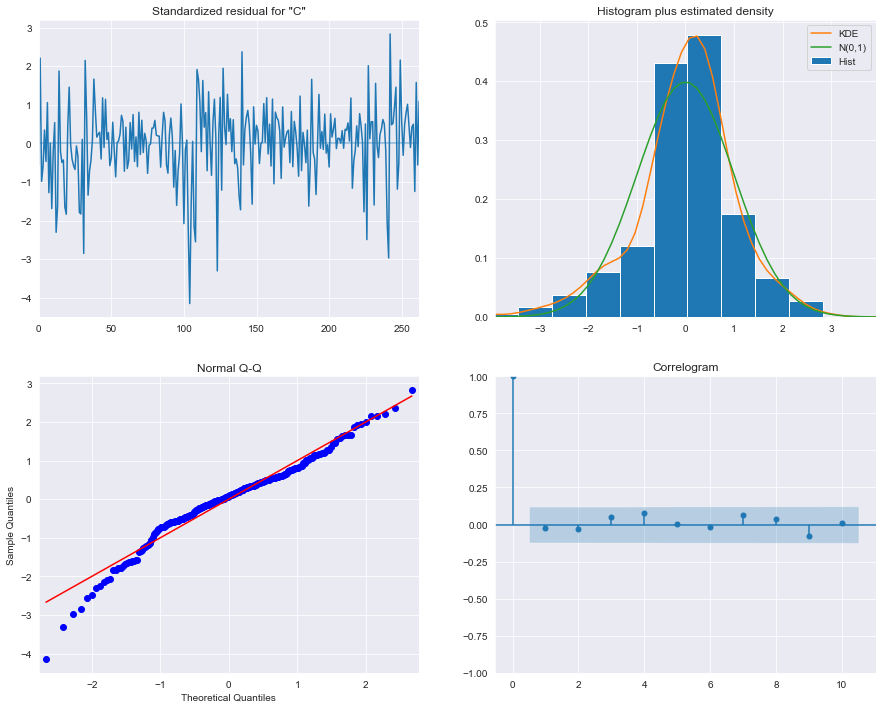

In [ ]:
res.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
print(res.forecast(steps=36))

264    4827.094684
265    4841.730877
266    4924.760567
267    4941.414794
268    5021.961457
269    5037.367366
270    5113.799423
271    5132.899894
272    5205.064163
273    5227.229555
274    5295.580765
275    5320.496845
276    5385.467658
277    5412.715716
278    5474.699538
279    5503.923629
280    5563.263428
281    5594.150798
282    5651.145174
283    5683.425113
284    5738.333673
285    5771.771616
286    5824.820111
287    5859.212987
288    5910.597768
289    5945.769822
290    5995.661728
291    6031.460907
292    6080.008630
293    6116.303443
294    6163.636460
295    6200.313253
296    6246.544357
297    6283.504953
298    6328.732459
299    6365.892104
Name: predicted_mean, dtype: float64


In [ ]:
fcast_res = res.get_forecast(steps=36)
print(fcast_res.summary_frame(alpha=0.10))

Cierre         mean     mean_se  mean_ci_lower  mean_ci_upper
264     4827.094684   80.848191    4694.111244    4960.078123
265     4841.730877  112.735052    4656.298218    5027.163535
266     4924.760567  135.705715    4701.544529    5147.976605
267     4941.414794  159.101051    4679.716854    5203.112734
268     5021.961457  179.511145    4726.691899    5317.231015
269     5037.367366  200.753282    4707.157601    5367.577131
270     5113.799423  219.220136    4753.214388    5474.384458
271     5132.899894  238.718793    4740.242421    5525.557367
272     5205.064163  256.303133    4783.483025    5626.645301
273     5227.229555  274.822232    4775.187210    5679.271900
274     5295.580765  291.898451    4815.450539    5775.710991
275     5320.496845  309.798824    4810.923125    5830.070564
276     5385.467658  326.594207    4848.267992    5922.667323
277     5412.715716  344.105497    4846.712542    5978.718890
278     5474.699538  360.752464    4881.314539    6068.084537
279     

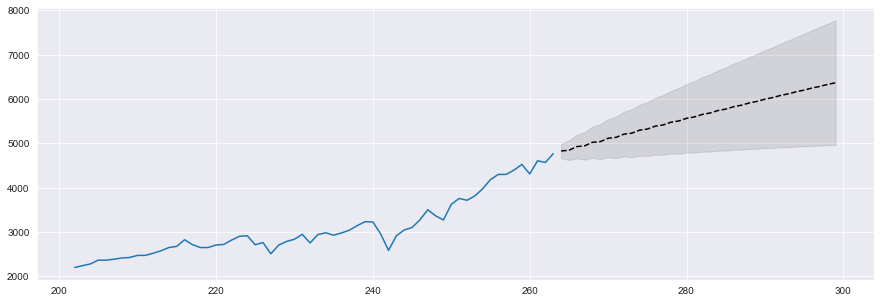

In [ ]:
fig, ax = plt.subplots( figsize=(15, 5))
data['Cierre'].loc['2018':].plot(ax=ax)

fcast = res.get_forecast(steps=36).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

### Definir ecuación

Nuestra ecuación quedaria como:

$LOG\vartriangle\triangledown_{s}(SyP500)=const+[\Phi_{1}Y_{t-1}+e_{t}]+[\Psi_{1}e_{t-1}]+[\varepsilon_{t}+e_{t}-e_{t-s}]$

Es decir...

* En la primera parte de nuesta ecuación tenemos el coefieciente de **Ar**, ($\Phi_{1}$) el cual es solo uno.
* Al igual que en **AR**, **MA** solo tiene un coeficiente ($\Psi_{1}$)
* Por ultumo tenemos nuestra diferencia estacional ($\varepsilon_{t}$), que de igual manera solo es un solo coeficiente.

Sustituyendo los coeficientes otenido en nuestro modelo **SARIMAX** tenemo:

$LOG\vartriangle\triangledown_{s}(SyP500)=0.0047+[-0.6055_{t-1}+e_{t}]+[0.7141e_{t-1}]+[0.0019_{t}+e_{t}-e_{t-s}]$

## 3. Realizar  pruebas  de  cambio  estructural. (Sustentar  análisis  con  referencias documentales.)

In [ ]:
data = pd.read_csv("C:/Users/ismay/OneDrive/Escritorio/Series/Bases/S&P_500_V.dummy.csv")
index = pd.Index(sm.tsa.datetools.dates_from_range('2000M1', '2021M12'))
data.index = index
data.head(12)

,Fecha,Cierre,t,t^2,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
2000-01-31,31/01/2000,1394.46,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2000-02-29,28/02/2000,1366.42,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2000-03-31,29/03/2000,1508.52,3,9,0,0,1,0,0,0,0,0,0,0,0,0
2000-04-30,30/04/2000,1468.25,4,16,0,0,0,1,0,0,0,0,0,0,0,0
2000-05-31,31/05/2000,1420.60,5,25,0,0,0,0,1,0,0,0,0,0,0,0
2000-06-30,28/06/2000,1454.82,6,36,0,0,0,0,0,1,0,0,0,0,0,0
2000-07-31,31/07/2000,1430.83,7,49,0,0,0,0,0,0,1,0,0,0,0,0
2000-08-31,30/08/2000,1502.59,8,64,0,0,0,0,0,0,0,1,0,0,0,0
2000-09-30,30/09/2000,1436.51,9,81,0,0,0,0,0,0,0,0,1,0,0,0
2000-10-31,31/10/2000,1429.40,10,100,0,0,0,0,0,0,0,0,0,1,0,0


La primer prueba que hacemos para saber si existe un cambio estructural, es el visual, a través de una gráfica, como lo podemos ver a continuación...

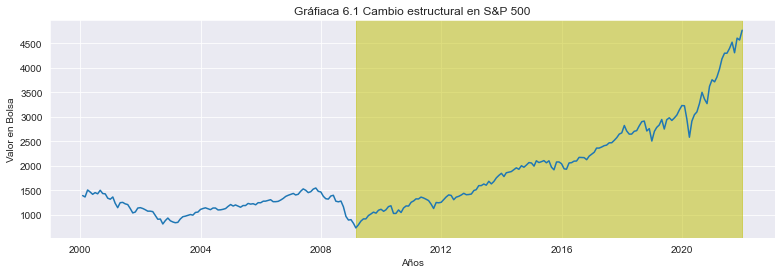

In [ ]:
fig, ax = plt.subplots(figsize=(13,4))
ax.plot(data['Cierre'])
ax.set_title('Gráfiaca 6.1 Cambio estructural en S&P 500')
ax.set_xlabel('Años')
ax.set_ylabel('Valor en Bolsa')
ax.axvspan('2009-02-28', '2021-12-31', color='y', alpha=0.5)

En la **Gráfica 6.1** podemos ver visualmente que a mediados de 2009 se dio un cambio estructural del indicador S&P 500. Dicho análisis tiene sentido, debido a lo que ya he mencionada, que en 2008 el mundo sufrió una crisis bursátil, la cual afecto principalmente a las empresas más importantes que cotizaban en la bolsa de estados unidos, debido a esto a la gente, le costó volver a confiar en este tipo de mercados, no fue hasta mediados de 2009 donde se volvió a confiar en dicho mercado, que hasta la actualidad, se ha mantenido con dicha tendencia.

### Hacemos una regresion de nuestros datos con el tiempo

In [ ]:
tspl= np.log(data['Cierre'])
tiempo= data['t']

In [ ]:
res = sm.OLS(tspl, tiempo).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Cierre   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              1001.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                    1.21e-91
Time:                        20:50:32   Log-Likelihood:                         -695.63
No. Observations:                 264   AIC:                                      1393.
Df Residuals:                     263   BIC:                                      1397.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
t              0.0431      0.001     31.640      0.000       0.040       0.046
==============================================================================
Omnibus:                      110.969   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.075
Skew:                           0.164   Prob(JB):                     0.000323
Kurtosis:                       1.837   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Es importante recalcar que contamos con **263** Numero de observaciones.

### Armamos las variables para la prueba de Chow: "*$SSR$, $SSR_1$, $SSR_2$*"

In [ ]:
print("SSR 2000-2021:", res.ssr)

SSR 2000-2021: 3004.8523701805034


Dividimos la serie segun es su cambio estructural.

In [ ]:
sac_antes=tspl.loc["2000/01":"2009/02"]; t_antes= tiempo.loc["2000/01":"2009/02"]
sac_des=tspl.loc["2009/03":"2021/12"]; t_des= tiempo.loc["2009/03":"2021/12"]

In [ ]:
res_antes=sm.OLS(sac_antes, t_antes).fit()
res_des=sm.OLS(sac_des, t_des).fit()
print("SSR 2000-2009:", res_antes.ssr)
print("SSR 2009-2021:", res_des.ssr)

SSR 2000-2009: 1350.4298143244364
SSR 2009-2021: 281.6319205251125


In [ ]:
ssr_total=res.ssr
ssr_antes=res_antes.ssr
ssr_des=res_des.ssr

**K**= Grados de libertad= 2 = Cueficientes calculados

**T**= Total de datos= 263

**2K**= 2x2= 4

**T-2k**= 263 - 4 = 259

$(SSR-(SSR_1+SSR_2)/K)/(SSR_1+SSR_2/T-2k)$

In [ ]:
numerador=(ssr_total-(ssr_antes+ssr_des))/2
denominador=(ssr_antes+ssr_des)/259
chow_test=numerador/denominador
print("Chowtest estadístico", chow_test, "; Critical value, 99.9%", 7.7)

Chowtest estadístico 108.92748937082754 ; Critical value, 99.9% 7.7


In [ ]:
import scipy.stats as ss

$H_0$ = no hay evidencia estadística de presencia de cambio estructural, es decir, los regresores $\beta_1$ y $\beta_2$ son iguales.

Cuando p<0.05 se rechaza la hipótesis nula.

In [ ]:
p_value=ss.f.sf(chow_test,2,261)
display(p_value)

4.0268297245114553e-35

Como el p_value =  4.0268297245114553e-35 < 0.05, entonces se rechaza la hipótesis nula y decimos que **no existe un cambio estructural**, por lo que el análisis gráfico es erróneo.

## 4. Propiedades  de  un  VAR.  (Definir  variables  complementarias,  referir  a  los datos, frecuencia, unidad de medida, fuente, etc. Gráfico de variables)

## Propiedades de un VAR.

**Nombre de las variables de nuestra serie.**

In [ ]:
SyP.columns

Index(['Fecha', 'S&P', 'Amazon', 'Azo', 't', 't^2', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12'],
      dtype='object')

**Periodicidad de la serie y dimensiones de la misma.**

In [ ]:
data.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=264, freq=None)

**Tipos de los valores de la serie** Es importante que ninguno de estos, con excepción de la *Fecha* sea *object* ya que entonces, python identifica a estas variables como NO numéricas. En nuestro caso esto no va a hacer problema.

In [ ]:
data.dtypes

Fecha      object
Cierre    float64
t           int64
t^2         int64
M1          int64
M2          int64
M3          int64
M4          int64
M5          int64
M6          int64
M7          int64
M8          int64
M9          int64
M10         int64
M11         int64
M12         int64
dtype: object

## Definir variables complementarias, referir a los datos, frecuencia, unidad de medida, fuente, etc. Gráfico de variables.

Cada uno de estos puntos ya fueron expustos en el *punto 1*

## 5. Evaluar estacionariedad de variables complementarias. (Aplicar transformaciones necesarias para eliminar presencia de raíz unitaria en las series, corroborar con pruebas ADF.)

Ahora veremos si existe estacionariedad, como ya lo analizamos en el punto 2, la serie original de la variable **S&P** no es estacionaria, esta se vuelve estacionaria cuando se hacen dos diferencias logarítmicas, por lo en esta parte ya solo se va a hacer el análisis estacionario de las 2 variables nuevas.

Como las **gráficas 2 y 3** no tienen la forma de un ruido blanco, (media 0 y varianza baja) es por ello por lo que no intuimos que no son estacionarias, por lo que debemos hacer diferencias en ambas variables.

In [ ]:
#Amazon
tspdAm= np.log(SyP['Amazon']).diff().dropna()
#Azo
tspdAz= np.log(SyP['Azo']).diff().dropna()

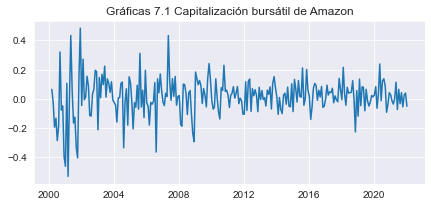

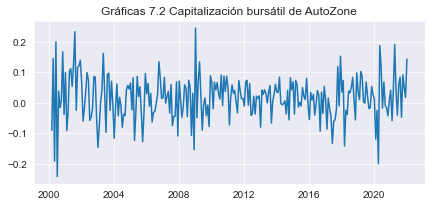

In [ ]:
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(tspdAm)
ax.set_title('Gráficas 7.1 Capitalización bursátil de Amazon')
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(tspdAz)
ax.set_title('Gráficas 7.2 Capitalización bursátil de AutoZone')
plt.show()

### Hacemos prueba Dickey-Fuller para corroborar estacionariedad.

In [ ]:
result = adfuller(tspdAm)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.228268
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


In [ ]:
result = adfuller(tspdAz)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.705637
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


Como podemos ver en ambas pruebas, el p-value es menor a 0.05, por lo que no se rechaza la hipótesis nula, por lo que existe prueba estadística de que ambas series con dos diferencias **son estacionarias**.

## 6. Definir VAR y añadir pronóstico. (Establecer orden del modelo VAR, realizar pruebas de normalidad y pruebas de autocorrelación de orden superior.)

### Establecer orden del modelo VAR

Antes de establecer el orden, debemos crear un modelo VAR primero, para ello creamos un objeto que solo contenga a las tres variables de estudio (*S&P, Amazon, Azo*)

In [ ]:
df=SyP[["S&P", "Amazon", "Azo"]]

In [ ]:
df.head()

,S&P,Amazon,Azo
2000-01-31,1394.46,64.5600,26.2500
2000-02-29,1366.42,68.8750,24.0000
2000-03-31,1508.52,67.0000,27.7500
2000-04-30,1468.25,55.1875,22.9375
2000-05-31,1420.60,48.3125,28.0000


A la base anterior se le aplica logaritmos...

In [ ]:
dataf = np.log(df).diff().dropna()

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
model = VAR(dataf)

Creamos modelo VAR, porque va a ser necesario para definir el orden del modelo VAR.

In [ ]:
results = model.fit()
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 14, Jun, 2022
Time:                     12:16:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -15.8379
Nobs:                     262.000    HQIC:                  -15.9356
Log likelihood:           992.887    FPE:                1.12388e-07
AIC:                     -16.0013    Det(Omega_mle):     1.07394e-07
--------------------------------------------------------------------
Results for equation S&P
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.004031         0.002810            1.435           0.151
L1.S&P            0.042288         0.074253            0.570           0.569
L1.Amazon         0.010959         0.024341            0.450           0.653
L

In [ ]:
nobs = 12
train = dataf[:-nobs]
test = dataf[-nobs:]

Realizamos prueba de 7 rezagos, para encontrar el **AIC** más grande en términos absolutos, ya que este va a hacer el mejor modelo Var para nuestra serie.

In [ ]:
p = [1,2,3,4,5,6,7]
for i in p:
    model = VAR(train)
    results = model.fit(i)
    print(f'VAR Order {i}')
    print('AIC {}'.format(results.aic))
    print('BIC {}'.format(results.bic))
    print()

VAR Order 1
AIC -15.967427779213587
BIC -15.798397655156199

VAR Order 2
AIC -15.99861980347981
BIC -15.701967149561101

VAR Order 3
AIC -15.99496212121792
BIC -15.569950579343125

VAR Order 4
AIC -16.031028700118856
BIC -15.476914752230227

VAR Order 5
AIC -16.093884467750975
BIC -15.409917338788564

VAR Order 6
AIC -16.0493703516102
BIC -15.234791910789589

VAR Order 7
AIC -16.0484231166078
BIC -15.10246777697931



Podemos ver que el VAR de orden 5 es el modelo que cuenta con el **AIC** más grande en términos absolutos, (**-16.093884467750975**) a comparación de los demás, por ello nuestro mejor modelo es de **Orden 5**.

In [ ]:
model.endog_names

['S&P', 'Amazon', 'Azo']

**Hacemos VAR de orden 5**

In [ ]:
results1 = model.fit(5)
results1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 14, Jun, 2022
Time:                     14:01:47
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -15.4099
Nobs:                     246.000    HQIC:                  -15.8185
Log likelihood:           980.371    FPE:                1.02507e-07
AIC:                     -16.0939    Det(Omega_mle):     8.48508e-08
--------------------------------------------------------------------
Results for equation S&P
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.004731         0.003297            1.435           0.151
L1.S&P            0.091308         0.080613            1.133           0.257
L1.Amazon         0.003482         0.026088            0.133           0.894
L

### Pronóstico.

In [ ]:
lag_order = results1.k_ar

In [ ]:
results1.forecast(df.values[-lag_order:], 7)

array([[  602.62066344, -1878.70076718, -2652.05426247],
       [  120.35888878, -2801.69740977, -1940.73901831],
       [  505.58814486,  -768.58595893, -1037.79130384],
       [  328.7337564 ,  -717.39487781,  -623.97847186],
       [  159.77849294,   974.85012985,  -196.88797185],
       [  271.7968042 ,   468.97630406,    91.4692123 ],
       [  146.57131929,   -17.95061031,    65.78152771]])

Hacemos pronóstico de las tres variables a 10 pasos.

3


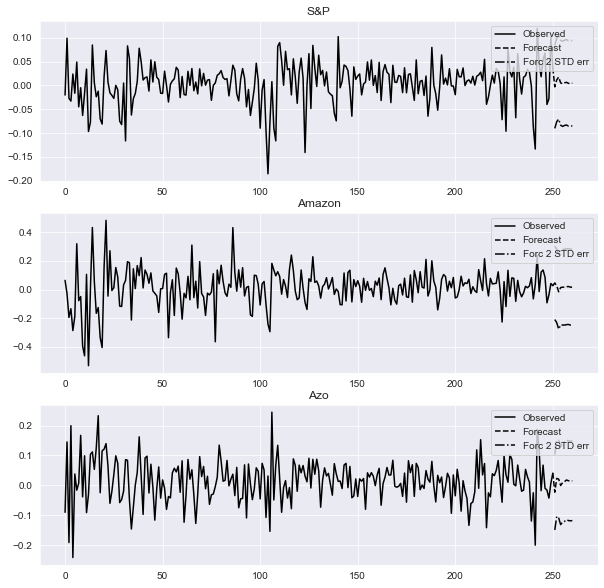

In [ ]:
results1.plot_forecast(10)
print(3)

### Realizar pruebas de normalidad

Para saber si hay presencia de normalidad, utilizamos el test de ***Jarque-Bera***.

In [ ]:
norm_test = results1.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
99.64,12.59,0.000,6


En la prueba de Normalidad, se tiene que $H_0$= El proceso se encuentra normalmente distribuido y si p>0.05 se aprueba la hipótesis nula y entonces decimos que existe un proceso normal.

En nuestro caso es lo contrario, ya que el p-value = 0.000 < 0.05, por lo que no aceptamos la $H_0$ y decimos que **no hay evidencia de que el proceso este normalmente distribuido**.

### Pruebas de autocorrelación

Para saber si existe autocorrelacion residual, hacemos el **test Portmanteau**

In [ ]:
white_test = results1.test_whiteness(nlags=12, adjusted=True)
white_test.summary()

Test statistic,Critical value,p-value,df
83.83,82.53,0.041,63


En esta prueba, la $H_0$ dice que no hay presencia de autocorrelacion residual, es decir que las variables despues de las transformaaciones llevan un proceso de ruido blanco.

Como p-value = 0.041 < 0.05, rechazamos la $H_O$ lo que dice que **hay evidencia estadistica de autocorrelación residual**.

Podemos reforzar este resultado con la matriz de autocorrelación:

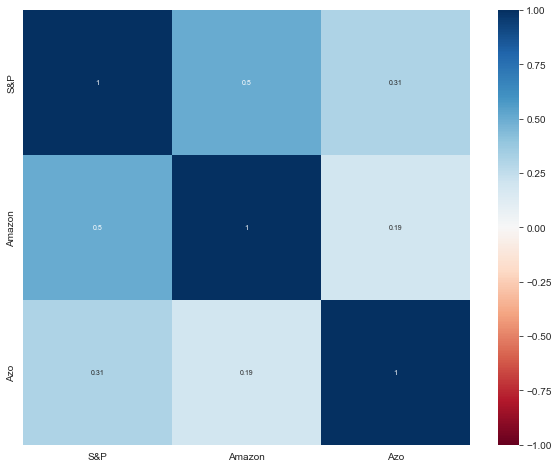

In [ ]:
plt.figure(figsize=(10,8))
correlations = dataf.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True,
           annot_kws={"size": 7}, vmin=-1, vmax=1);

Se busca que, quitando la diagonal principal, las demás correlaciones sean 0 o los más cercanos a 0, por ello en nuestro caso los valores son resultados más cercanos al 1, por eso hablamos de una **Autocorrelación positiva**.

Debido a que existe autocorrelación, se debera hacer el **Modelo de corrección de errores de vector** El cual se puede ver en el siguiente punto.

## 7. De ser necesario considerar Cointegración. (Realizar prueba de Johansen, estimar VECM, añadir pronóstico.)

In [ ]:
from statsmodels.tsa.vector_ar import vecm
from statsmodels.tsa.vector_ar.vecm import coint_johansen

### Prueba de Johansen

In [ ]:
rank = vecm.select_coint_rank(df,det_order=0, k_ar_diff=1, signif=0.1)
rank.summary()

r_0,r_1,test statistic,critical value
0,3,36.84,27.07
1,3,9.306,13.43


Pero como se encontró autocorrelación residual, debemos de todos modos hacer el modelo **VECM**.
Para la prueba Johansen tomamos solo la primera fila. En dicha prueba $H_0$ dice que no existe cointegración, en este caso no utilizamos el valor p, para rechazar o no rechazar la $H_0$ debemos analizar los valores de **test statistic** y **critical value**.

* Si test statistic < critical value: No se rechaza la $H_0$, por lo que decimos que existe evidencia estadística de cointegración.

* Si test statistic > critical value: Se rechaza la $H_0$, por lo que decimos que no evidencia estadística de cointegración.

En nuestro caso tenemos que: test statistic > critical value, es decir, 36.84 > 27.02, rechazando así la $H_0$, por lo que decimos que no hay evidencia estadística de que exista cointegración.

Pero como se encontró autocorrelación residual, debemos de todos modos hacer el modelo **VECM**.

In [ ]:
mod = vecm.VECM(df, k_ar_diff=1, coint_rank=3, freq='M', deterministic="ci")
results2 = mod.fit()
print(results2.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation S&P
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.S&P        -0.1246      0.076     -1.630      0.103      -0.275       0.025
L1.Amazon     -0.0272      0.071     -0.380      0.704      -0.167       0.113
L1.Azo         0.3721      0.146      2.546      0.011       0.086       0.659
Det. terms outside the coint. relation & lagged endog. parameters for equation Amazon
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.S&P        -0.1525      0.078     -1.956      0.051      -0.305       0.000
L1.Amazon     -0.0900      0.073     -1.235      0.217      -0.233       0.053
L1.Azo         0.3385      0.149      2.271      0.023       0.046       0.631
Det. terms outside the coint. relation & 

Hacemos el pronóstico del modelo VECM, para 10 pasos.

(array([[4924.03796875, 3485.78040402, 2123.53266896],
        [4983.73989618, 3529.12609939, 2163.55809702],
        [5064.60553923, 3602.93614261, 2206.00393584],
        [5144.37991099, 3673.03676395, 2249.20474611],
        [5226.09814481, 3745.35874408, 2293.207118  ],
        [5309.27810806, 3818.94857598, 2338.06503908],
        [5394.05571435, 3894.01374669, 2383.7896753 ],
        [5480.44435048, 3970.54861632, 2430.39840745],
        [5568.48095266, 4048.58812503, 2477.90835814],
        [5658.1988936 , 4128.16043824, 2526.33711606]]),
 array([[4919.13149348, 3480.77678956, 2121.08697351],
        [4977.01908766, 3522.47717319, 2160.15336279],
        [5056.52277502, 3594.90016374, 2201.86820862],
        [5135.15773149, 3663.81368664, 2244.4478038 ],
        [5215.87737245, 3735.06637049, 2287.89878087],
        [5298.15608919, 3807.67190136, 2332.25404002],
        [5382.10275381, 3881.81579044, 2377.51183297],
        [5467.71266613, 3957.47809252, 2423.68097136],
        

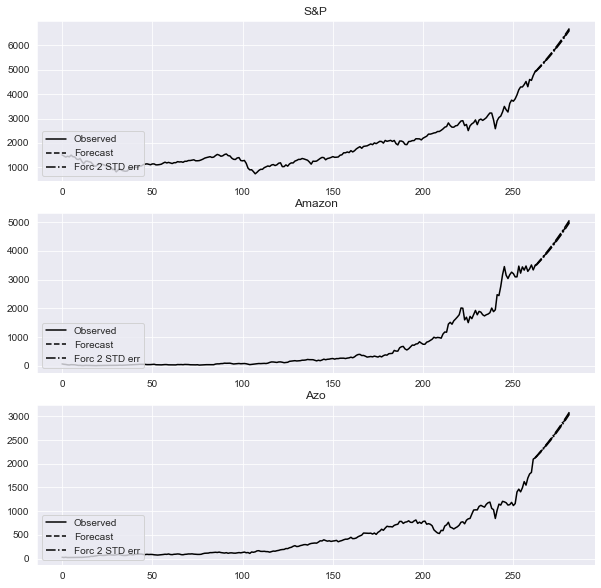

In [ ]:
results2.plot_forecast(steps=20,plot_conf_int=True,alpha=0.9)

results2.predict(steps=10, alpha=0.95)

## 8. Realizar análisis residual del modelo VAR o VECM. (Según sea el caso.)

3


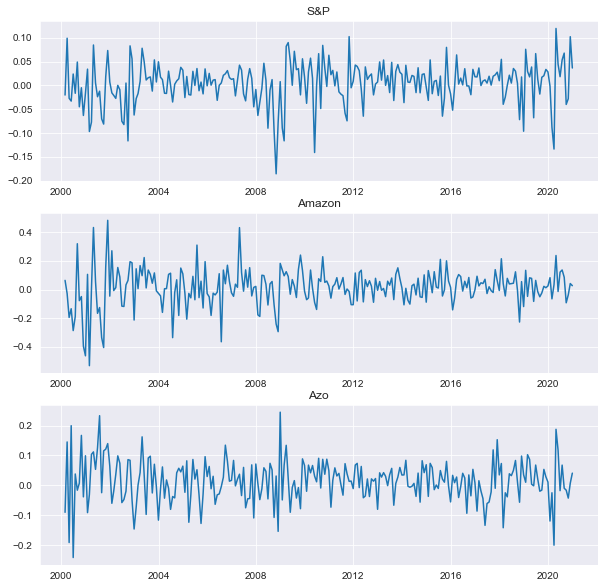

In [ ]:
results1.plot()
print(3)

**S&P**

El comportamiento residual de la variable S&P, que es la primer gráfica, podemos ver que el comportamiento de estos residuos tiende a la media durante prácticamente toda la serie, pero justo en el medio de la serie y al final, los residuos se encuentran de manera dispersa, pero con una varianza un mínima, para considerarla como un ruido blanco.

**Amazon**

El comportamiento de los residuos, de igual manera tiene una forma de ruido blanco, ya que estos tienden a la media y tienen una varianza baja, pero es justo al principio de la serie, que dichos residuos se encuentran más dispersos y contrariamente, al final de la serie los residuos se encuentran más cercanos a la media y con varianza aún más baja, lo cual es lógico, ya que si vemos la **Gráfica 2** podemos ver que al final, la serie tiene una presencia de estacionalidad.

**AutoZone**

Por último, podemos ver que de igual manera que las otras variables, en esta los residuos siguen un comportamiento de ruido blanco, talvez esta es la que cuenta con mayor varianza de las 3, pero aun así la varianza en baja, como para decir que los residuos tienden a la media.

## 9. Análisis de la función impulso-respuesta.

En con este análisis podemos ver el impacto que tiene una variable sobre otra.

In [ ]:
irf = results2.irf(10)

3


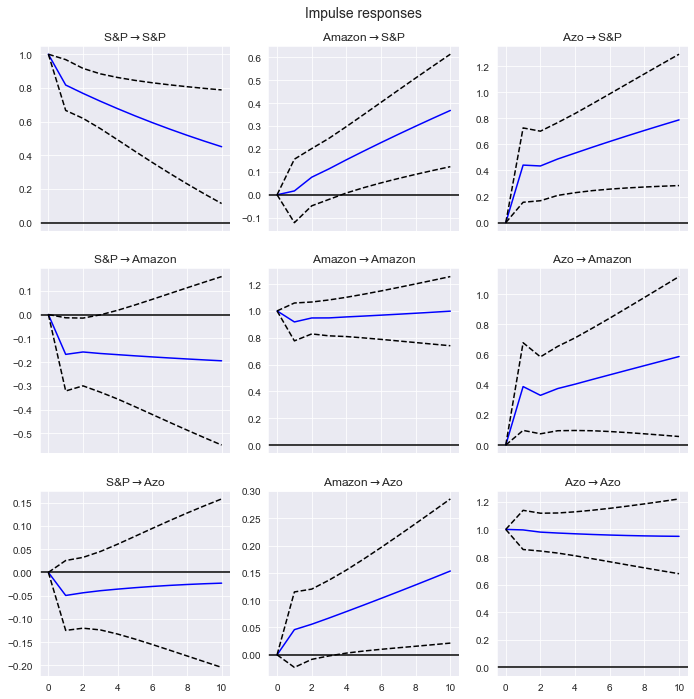

In [ ]:
irf.plot(orth=False)
print(3)

A qui hacemos el impulso respuesta del modelo VCEM, ante cada una de las variables de la serie. Como mencionábamos al principio, buscamos saber que tanto impactan variables como Amazon y AutoZone en el indicador S&P.

* S&P --> Amazon: Vemos que la variable S&P responde a un impulso de la variable Amazon, con un intervalo de confianza de la banda superior de alrededor de 2.5 y de inferior tenemos la misma cantidad

* S&P --> Azo: Vemos que la variable S&P responde a un impulso de la variable AutoZone, con un intervalo de confianza de la banda superior de alrededor de 1.5 y de inferior tenemos la misma cantidad.

Por lo que podemos concluir que la variable Amazon impulsa en mayor cantidad a la variable S&P, que la variable AutoZone.

## 10. Análisis de Causalidad de Granger.

### Prueba de Granger

In [ ]:
grangert= results1.test_causality('S&P', ['Amazon', 'Azo'], kind='f')

In [ ]:
print(grangert)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: ['Amazon', 'Azo'] do not Granger-cause S&P: fail to reject at 5% significance level. Test statistic: 0.638, critical value: 1.844>, p-value: 0.782>


La prueba de Granger nos permite saber si las variables se pueden pronosticar entre sí.

In [ ]:
grangert.summary()

Test statistic,Critical value,p-value,df
0.6383,1.844,0.782,"(10, 690)"


En la prueba de Granger la $H_0$ dice que la serie "x" no causa Granger a "y", como el p-value = 0.782 > 0.05, se rechaza la $H_0$, por lo que no existe Ganger causalidad en tres las variables explicativas (Amazon y Azo) a la variable principal (S&P).